In [3]:
# import required modules
import numpy as np
import matplotlib as plt
from easypreprocessing import EasyPreProcessing
from sklearn.ensemble import RandomForestRegressor

In [167]:
# load the data
data = EasyPreProcessing('data.csv')


**Initialization Parameters**

1.  output            - Set output variable/dependent variable
2.  dates.features    - Set datetime field names (optional)

For example:
1.  output = 'column_name'
2.  dates.features = ['date_field_1','date_field_2']
        

In [168]:
data.info
data.categorical.fields
data.numerical.fields
data.missing_values
data.numerical.impute()
data.df



**General Template**
<code>
from easypreprocessing import EasyPreProcessing
prep = EasyPreProcessing('filename_here.csv')
prep.df
prep.output = 'output_variable_here'
prep.remove_blank()
prep.missing_values
prep.categorical.impute()
prep.numerical.impute()
prep.categorical.encode()
prep.correlation()
prep.standardize()
X_train, X_test, y_train, y_test = prep.split()
</code>


**Categorical Preprocessing**
<table>
<tr>
<td>categorical.fields</td><td>Display all categorical field names</td>
</tr>
<tr>
<td>categorical.unique</td><td>Display unique/distinct categorical values</td>
</tr>
<tr>
<td>categorical.impute()</td><td>Handle categorical missing values. Parameters {'mean', 'medium', 'mode'}</td>
</tr>
<tr>
<td>categorical.encode()</td><td>Encode categorical features. Parameters {'le': LabelEncoding, 'ohe': OneHotEncoding}</td>
</tr>
</table>

**Numerical Preprocessing**
<table>
<tr>
<td>numerical.fields</td><td>Display all numerical field names</td>
</tr>
<tr>
<td>numerical.impute()</td><td>Handle numerical missing values. Parameters {'mean', 'medium', 'mode'}</td>
</tr>
</table>

**Date Preprocessing**
<table>
<tr>
<td>dates.features</td><td>Define list of all datetime feature names</td>
</tr>
<tr>
<td>dates.split_datetime()</td><td>Split all datetime features into discrete fields (Year, Month, Day, Hour, Minute)</td>
</tr>
</table>

**General Preprocessing**
<table>
<tr>
<td>missing_values</td><td>Display missing value report</td>
</tr>
<tr>
<td>remove_blank()</td><td>Remove empty/blank columns</td>
</tr>
<tr>
<td>correlation()</td><td>Display correlation heatmap</td>
</tr>
<tr>
<td>standardize()</td><td>Standardize entire dataset except dependent variable</td>
</tr>
<tr>
<td>encode_output()</td><td>Encode dependent feature/output variable</td>
</tr>
<tr>
<td>over_sample()</td><td>Oversample dataset. Parameters {'smote': SMOTE, 'ros': RandomOverSample}</td>
</tr>
<tr>
<td>clustering.apply()</td><td>Cluster dataset using elbow plot</td>
</tr>
</table>
        

Numerical features imputated successfully.


,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1.0,17/01/11,8091.0,216418.0,99.0375,111.8625,0.0,0.0,20.0
1,2.0,17/01/11,8091.0,216419.0,99.0375,99.0375,0.0,0.0,28.0
2,3.0,17/01/11,8091.0,216425.0,133.9500,133.9500,0.0,0.0,19.0
3,4.0,17/01/11,8091.0,216233.0,133.9500,133.9500,0.0,0.0,44.0
4,5.0,17/01/11,8091.0,217390.0,141.0750,141.0750,0.0,0.0,52.0
...,...,...,...,...,...,...,...,...,...
150145,212638.0,09/07/13,9984.0,223245.0,235.8375,235.8375,0.0,0.0,38.0
150146,212639.0,09/07/13,9984.0,223153.0,235.8375,235.8375,0.0,0.0,30.0
150147,212642.0,09/07/13,9984.0,245338.0,357.6750,483.7875,1.0,1.0,31.0
150148,212643.0,09/07/13,9984.0,547934.0,141.7875,191.6625,0.0,1.0,12.0


In [169]:
data.dataset['key'] = data.df['week'].astype(str) + '_' + data.df['store_id'].astype(str)

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,key
0,1.0,17/01/11,8091.0,216418.0,99.0375,111.8625,0.0,0.0,20.0,17/01/11_8091.0
1,2.0,17/01/11,8091.0,216419.0,99.0375,99.0375,0.0,0.0,28.0,17/01/11_8091.0
2,3.0,17/01/11,8091.0,216425.0,133.9500,133.9500,0.0,0.0,19.0,17/01/11_8091.0
3,4.0,17/01/11,8091.0,216233.0,133.9500,133.9500,0.0,0.0,44.0,17/01/11_8091.0
4,5.0,17/01/11,8091.0,217390.0,141.0750,141.0750,0.0,0.0,52.0,17/01/11_8091.0
...,...,...,...,...,...,...,...,...,...,...
150145,212638.0,09/07/13,9984.0,223245.0,235.8375,235.8375,0.0,0.0,38.0,09/07/13_9984.0
150146,212639.0,09/07/13,9984.0,223153.0,235.8375,235.8375,0.0,0.0,30.0,09/07/13_9984.0
150147,212642.0,09/07/13,9984.0,245338.0,357.6750,483.7875,1.0,1.0,31.0,09/07/13_9984.0
150148,212643.0,09/07/13,9984.0,547934.0,141.7875,191.6625,0.0,1.0,12.0,09/07/13_9984.0


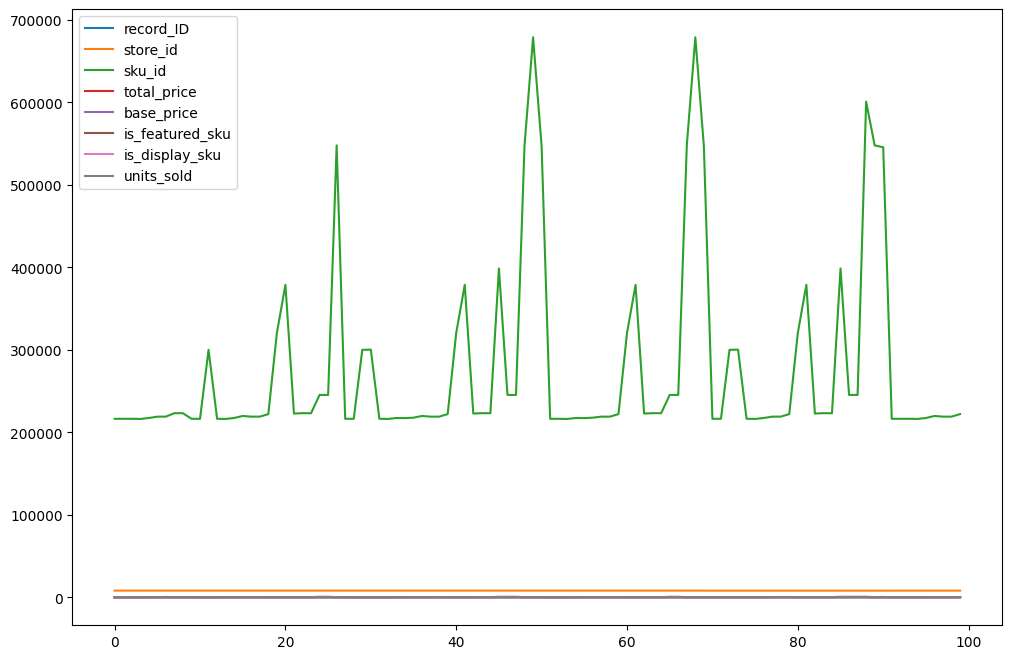

In [170]:
data.df[:100].plot(figsize=(12,8))
data.df

In [171]:
data.df['day_1'] = data.df['units_sold'].shift(-1)
data.df['day_2'] = data.df['units_sold'].shift(-2)
data.df['day_3'] = data.df['units_sold'].shift(-3)
data.df['day_4'] = data.df['units_sold'].shift(-4)
data.df

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,key,day_1,day_2,day_3,day_4
0,1.0,17/01/11,8091.0,216418.0,99.0375,111.8625,0.0,0.0,20.0,17/01/11_8091.0,28.0,19.0,44.0,52.0
1,2.0,17/01/11,8091.0,216419.0,99.0375,99.0375,0.0,0.0,28.0,17/01/11_8091.0,19.0,44.0,52.0,18.0
2,3.0,17/01/11,8091.0,216425.0,133.9500,133.9500,0.0,0.0,19.0,17/01/11_8091.0,44.0,52.0,18.0,47.0
3,4.0,17/01/11,8091.0,216233.0,133.9500,133.9500,0.0,0.0,44.0,17/01/11_8091.0,52.0,18.0,47.0,50.0
4,5.0,17/01/11,8091.0,217390.0,141.0750,141.0750,0.0,0.0,52.0,17/01/11_8091.0,18.0,47.0,50.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150145,212638.0,09/07/13,9984.0,223245.0,235.8375,235.8375,0.0,0.0,38.0,09/07/13_9984.0,30.0,31.0,12.0,15.0
150146,212639.0,09/07/13,9984.0,223153.0,235.8375,235.8375,0.0,0.0,30.0,09/07/13_9984.0,31.0,12.0,15.0,NaN
150147,212642.0,09/07/13,9984.0,245338.0,357.6750,483.7875,1.0,1.0,31.0,09/07/13_9984.0,12.0,15.0,NaN,NaN
150148,212643.0,09/07/13,9984.0,547934.0,141.7875,191.6625,0.0,1.0,12.0,09/07/13_9984.0,15.0,NaN,NaN,NaN


In [172]:
df = data.df.dropna()

In [173]:
x1, x2, x3, x4, y = df['day_1'], df['day_2'], df['day_3'], df['day_4'], df['units_sold']
x1, x2, x3, x4, y = np.array(x1), np.array(x2), np.array(x3), np.array(x4), np.array(y)
x1, x2, x3, x4, y = x1.reshape(-1,1), x2.reshape(-1,1), x3.reshape(-1,1), x4.reshape(-1,1), y.reshape(-1,1)
split_percentage = 15
test_split = int(len(df)*(split_percentage/100))
x = np.concatenate((x1, x2, x3, x4), axis=1)
# spliting the data into training and testing
X_train,X_test,y_train,y_test = x[:-test_split],x[-test_split:],y[:-test_split],y[-test_split:]

In [174]:
# build the R F R model
RFR = RandomForestRegressor()
model = RFR.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\Users\Arun Venkat\AppData\Local\Temp\ipykernel_15328\3027576082.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFR.fit(X_train, y_train)


In [175]:
print('predition: ', y_pred)
print("R Sq. Score for Random Forest Regression :", model.score(X_test, y_test))

predition:  [106.22  30.51  55.96 ...  32.15  43.9   30.22]
R Sq. Score for Random Forest Regression : -0.04648922252596499


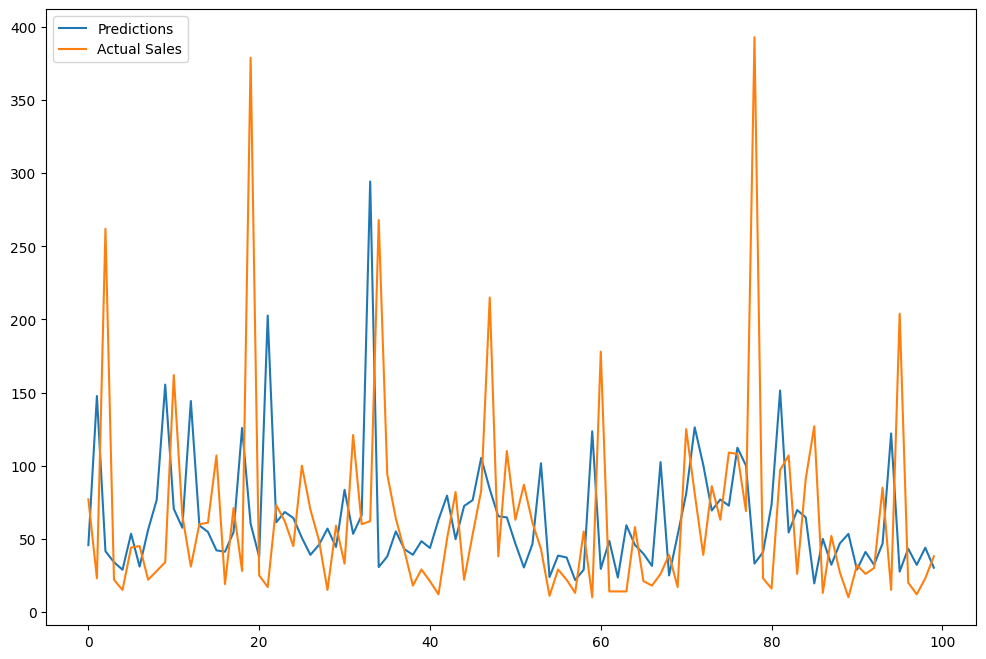

In [176]:
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(y_pred[-100:], label='Predictions')
plt.plot(y_test[-100:], label='Actual Sales')
plt.legend(loc="upper left")
plt.show()